In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Real_Combine.csv')
df = df.dropna()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [3]:
regressor = AdaBoostRegressor(random_state=0)
regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [4]:
print("R2(train data): {}".format(regressor.score(X_train, y_train)))
print("R2(test data): {}".format(regressor.score(X_test, y_test)))

R2(train data): 0.6811306100180031
R2(test data): 0.5382249429249153


In [5]:
score=cross_val_score(regressor, X, y, cv=10)
score.mean()

-0.34213988623778235

In [6]:
prediction=regressor.predict(X_test)

<AxesSubplot:xlabel='VM', ylabel='Density'>

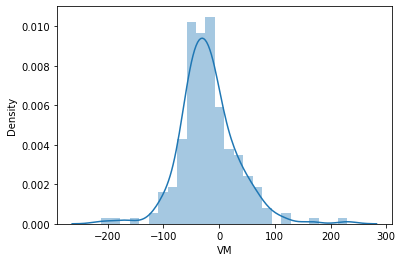

In [7]:
sns.distplot(y_test-prediction)

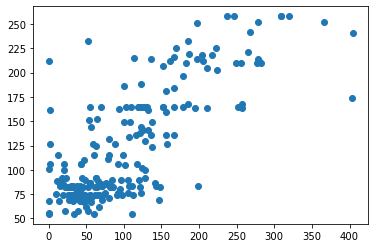

In [8]:
plt.scatter(y_test, prediction)

In [9]:
from sklearn.linear_model import LinearRegression
base_estimator = LinearRegression()
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
learning_rate = [0.01, 0.05, 0.1, 0.5, 1.0]

random_grid={
    'base_estimator' : [base_estimator],
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
}
regressor = AdaBoostRegressor()
gb = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, 
                        scoring='neg_mean_squared_error', n_iter=100, cv=10, verbose=2,
                      random_state=0)

gb.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=Line

[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=900; total time=   1.9s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=900; total time=   1.8s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=900; total time=   1.7s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=900; total time=   1.7s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=900; total time=   2.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=900; total time=   1.8s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=900; total time=   2.1s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=900; total time=   2.1s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=900; total time=   2.1s
[CV] END base_estimator=LinearRegression(), learning_rate=0.01, n_estimators=1000; total ti

[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=700; total time=   0.4s
[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=700; total time=   0.3s
[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=700; total time=   0.3s
[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=700; total time=   0.3s
[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=700; total time=   0.3s
[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=700; total time=   0.4s
[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=700; total time=   0.4s
[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=800; total time=   0.4s
[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=800; total time=   0.3s
[CV] END base_estimator=LinearRegression(), learning_rate=0.05, n_estimators=800; total tim

[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=500; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=500; total time=   0.1s
[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=500; total time=   0.1s
[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=500; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=500; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=600; total time=   0.1s
[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=600; total time=   0.1s
[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=600; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=600; total time=   0.2s
[CV] END base_estimator=LinearRegression(), learning_rate=0.1, n_estimators=600; total time=   0.2s


[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=300; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=300; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=400; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=400; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=400; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=400; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=400; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=400; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=400; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=0.5, n_estimators=400; total time=   0.0s


[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=200; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=200; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=200; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=200; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=200; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=300; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=300; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=300; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=300; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=300; total time=   0.0s


[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=1000; total time=   0.0s
[CV] END base_estimator=LinearRegression(), learning_rate=1.0, n_estimators=1000; total time=   0.0s


RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(), n_iter=100,
                   param_distributions={'base_estimator': [LinearRegression()],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [10]:
print(gb.best_params_)
print("\n",gb.best_score_)

{'n_estimators': 100, 'learning_rate': 0.01, 'base_estimator': LinearRegression()}

 -2869.8638612301447


In [11]:
predictions = gb.predict(X_test)

<AxesSubplot:ylabel='Density'>

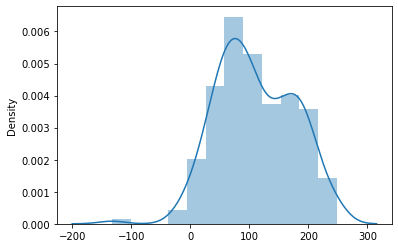

In [12]:
sns.distplot(predictions)

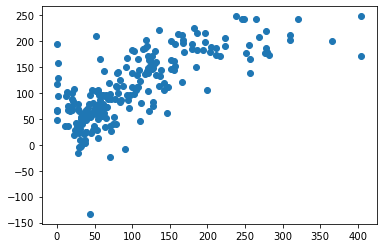

In [13]:
plt.scatter(y_test,predictions)

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.83814128010978
MSE: 3087.033724457303
RMSE: 55.56108102311638
